In [1]:
#@title ### Installing AI course package { run: "auto", form-width: "60%", display-mode: "form" }

import os
original_dir = os.getcwd()
!git clone https://github.com/amaleki2/ai_course_materials.git
os.chdir('ai_course_materials')
!pip install -U -q .
os.chdir(original_dir)

try:
    from ai_course import Tester
    print("installation was successful!")
except:
    print("something went wrong!")

Cloning into 'ai_course_materials'...
remote: Enumerating objects: 89, done.
remote: Counting objects: 100% (89/89), done.
remote: Compressing objects: 100% (66/66), done.
remote: Total 89 (delta 33), reused 74 (delta 18), pack-reused 0
Unpacking objects: 100% (89/89), done.
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
installation was successful!


In this assignment, we want to look more carefully at classification problems. 
We will discuss various classification metrics. 
 
Let's implement some of these metrics first.

Below you will implement accuracy, recall, precision and F1 scores, given the values of true and predicted labels. A test is provided for you in the following cell. Remember

$$ Acc = \frac{TP + TN}{TP + TN + FP + FN} $$
$$ Recall = \frac{TP}{TP + FN} $$
$$ Precision = \frac{TP}{TP + FP} $$
$$ F1 = 2 \frac{Recall \times Precision}{Recall + Precision}$$




In [1]:
def compute_accuracy(y_true, y_pred):
    """
    computing accuracy: (TP + TN) / (TP + TN + FP + FN)
    :param y_true: 1d numpy array of true labels.
    :param y_pred: 1d numpy array of predicted labels.
    :return: accuracy
    """
    accuracy = np.mean(y_true == y_pred)
    return accuracy

def compute_recall(y_true, y_pred):
    """
    computing recall: (TP) / (TP + FN)
    :param y_true: 1d numpy array of true labels.
    :param y_pred: 1d numpy array of predicted labels.
    :return: recall
    """
    TP = (np.logical_and(y_true==1, y_pred==1)).sum()  # true positive
    FN = (np.logical_and(y_true==1, y_pred==0)).sum()  # false negative
    recall = TP / (TP + FN)
    return recall

def compute_precision(y_true, y_pred):
    """
    computing precision: (TP) / (TP + FP)
    :param y_true: 1d numpy array of true labels.
    :param y_pred: 1d numpy array of predicted labels.
    :return: precision
    """
    TP = (np.logical_and(y_true==1, y_pred==1)).sum()  # true positive
    FP = (np.logical_and(y_true==0, y_pred==1)).sum()  # false negative
    precision = TP / (TP + FP)
    return precision

def compute_F1(y_true, y_pred):
    """
    computing F1 score: 2 * recall * precision / (recall + precision)
    :param y_true: 1d numpy array of true labels.
    :param y_pred: 1d numpy array of predicted labels.
    :return: F1 score
    """
    recall = compute_recall(y_true, y_pred)
    precision = compute_precision(y_true, y_pred)
    F1 = 2 * recall * precision / (recall + precision) # 1/ (1/recall + 1/precision)
    return F1

The implementation above was for the purpose of better practicing python, and specially numpy. In practice, we mostly use sklearn library for such calculation

# Diabetes dataset
### reading and splitting dataset
For the rest of the module, we are going to work with the Diabetes dataset.  Import the data and split into train test sets.

In [3]:
import numpy as np
import pandas as pd

data = pd.read_csv("data/diabetes.csv")

X = data.drop(columns=["Unnamed: 0", "Outcome"]).to_numpy()
y = data["Outcome"].to_numpy()

In [4]:
X.shape

(768, 7)

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,  y_test = train_test_split(X, y, test_size=0.1)

### Decision Tree

train a decision tree. use `sklearn.metrics` library to compute and report accuracy, precision, recall and f1 



In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
y_pred = tree_model.predict(X_test)
print('Accuracy: %0.3f' %accuracy_score(y_test, y_pred))
print('Precision: %0.3f' %precision_score(y_test, y_pred))
print('Recall: %0.3f' %recall_score(y_test, y_pred))
print('F1: %0.3f' %f1_score(y_test, y_pred))

Accuracy: 0.649
Precision: 0.393
Recall: 0.524
F1: 0.449


## Recall-Precision curve

Use `sklearn.metrics.precision_recall_curve` to plot precision recall curve

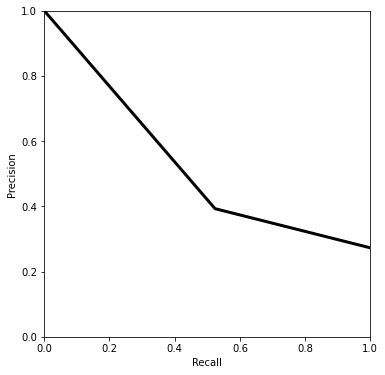

In [7]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

plt.figure(figsize=(6,6))
plt.plot(recall, precision, 'k', linewidth=3)
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.gca().set_aspect('equal')

### ROC Curve

use `roc_curve` from the `sklearn.metrics` library to compute false positive and true positive rate. Plot ROC curve. Use `auc` to compute the area under the curve. 

In [ ]:
from sklearn.metrics import roc_curve, auc

FPR, TPR, thereshold = roc_curve(y_test, y_pred)
auc_value = auc(FPR, TPR)
plt.figure(figsize=(6,6))
plt.plot(FPR, TPR, "k", linewidth=3)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.gca().set_aspect('equal')
print("auc value =%0.3f" %auc_value)

### Confusion matrix
Another tool for evaluating classification is confusion matrix. 

Confusion matrix shows where the predictions lie in the true-false spectrum

In [8]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[39, 17],
       [10, 11]], dtype=int64)

### evaluation set

So far, we have used the default values for the input of the decision tree. 
Perhaps the most import property of a tree is the depth, which by default does not have a maximum value (i.e. no limit).  

Now, we are going to use  `GridSearch` to fine tune  the `max_depth` property. If we find tune the hyper parameters on the test data, that is considered as data leakage. Remember, during training, the model should NOT see the test set in any shape or form. 

One way to mediate this problem is to create another split on the train set. We will set aside a portion of train set, and call it evaluation set. We train the model on the rest of train set, and then use evaluation set for turning hyper paramters. When training is over, and hyper parameters are tuned, then we test the model on the test set. 


In [9]:
X_train, X_eval, y_train, y_eval = train_test_split(X_train, y_train, test_size=0.1)

In [16]:
from sklearn.model_selection import GridSearchCV

params = { "max_depth": [100, 200, 300, 400, 500] }
grid = GridSearchCV(DecisionTreeClassifier(), params, cv=5, scoring="accuracy")
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [100, 200, 300, 400, 500]},
             scoring='accuracy')

In [15]:
grid.cv_results_

{'mean_fit_time': array([0.00159769, 0.00120053, 0.00139933, 0.00099969, 0.00140014]),
 'std_fit_time': array([4.87803024e-04, 3.99065146e-04, 4.89843359e-04, 6.74349576e-07,
        4.88986883e-04]),
 'mean_score_time': array([0.00019984, 0.00020008, 0.00020013, 0.00020247, 0.00019979]),
 'std_score_time': array([0.00039968, 0.00040016, 0.00040026, 0.00040493, 0.00039959]),
 'param_max_depth': masked_array(data=[100, 200, 300, 400, 500],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 100},
  {'max_depth': 200},
  {'max_depth': 300},
  {'max_depth': 400},
  {'max_depth': 500}],
 'split0_test_score': array([0.712, 0.68 , 0.72 , 0.672, 0.68 ]),
 'split1_test_score': array([0.74193548, 0.74193548, 0.74193548, 0.77419355, 0.72580645]),
 'split2_test_score': array([0.65322581, 0.64516129, 0.66129032, 0.64516129, 0.65322581]),
 'split3_test_score': array([0.75      , 0.75      , 0.75806452, 0.75      , 0.7

Last week we learn about Logistic Regression model as our very first linear classification model. Other linear classifiction models implemented in sklearn include `SGDClassifier`, `PassiveAggressiveClassifier` and `RidgeClassifier`. They all share a parameter `C` which is the inverse of regularization coefficient. (i.e. large `C` means weaker regularization). 

Use GridSearch to find the optimal value of the regularization parameters for each of these models. Use Recall as the metric. Remember for `SGDClassifer` and `RidgeClassifier`, the regularization parameters is $\alpha$. For `LogisticRegression` and `PassiveAgressiveClassifier`, we have parameter `C` which corresponds to $2/\alpha$. 

Now use a random forest model. 

# Example with multi-class classification

Most metrics we studied are for binary classification (labels =0 and 1). For the case of multi-label classification, confusion matrix is a useful tool. 

To practice this here we import digit dataset which contains images of digits 0-9. 
All images are 8 by 8 pixels, which are flattens to 1d numpy arrays with 64 entries. 

Let's plot some of these

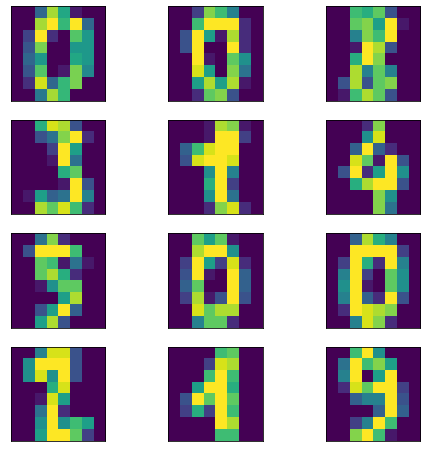

In [17]:
from sklearn.datasets import load_digits
dataset = load_digits()
X, y = dataset.data, dataset.target

plt.figure(figsize=(8,8))
for i in range(12):
    plt.subplot(4, 3, i+1) 
    plt.imshow(X[20*i, :].reshape(8, 8)) 
    plt.xticks([], [])
    plt.yticks([], [])